<a href="https://colab.research.google.com/github/mkqcodes/real-estate-listing-analysis/blob/main/V1_EDA_DataAudit_Data_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Real Estate Market Insights:

An Exploratory Analysis of Zameen.com Listings in Pakistan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from collections import Counter
import re


In [ ]:
# #to see max rows
# pd.set_option('display.max_rows', None)

#to not see max rows
pd.reset_option('display.max_rows')

In [ ]:
# Loading Data from Google Sheets
url = "https://docs.google.com/spreadsheets/d/12JWizEwTPYgXOmh_762iy-Q5694zxhlO/export?format=csv"

listings = pd.read_csv(url)

In [ ]:
# Count of row and columns
print(listings.shape)

(18255, 59)


In [ ]:
# List of columns
listings.columns

Index(['Title', 'URL', 'City', 'Type', 'Area', 'Price', 'Purpose', 'Location',
       'Description', 'Built in year', 'Parking Spaces',
       'Double Glazed Windows', 'Central Air Conditioning', 'Central Heating',
       'Flooring', 'Electricity Backup', 'Waste Disposal', 'Floors',
       'Other Main Features', 'Furnished', 'Bedrooms', 'Bathrooms',
       'Servant Quarters', 'Drawing Room', 'Dining Room', 'Kitchens',
       'Study Room', 'Prayer Room', 'Powder Room', 'Store Rooms', 'Steam Room',
       'Lounge or Sitting Room', 'Laundry Room', 'Other Rooms',
       'Broadband Internet Access', 'Satellite or Cable TV Ready', 'Intercom',
       'Community Lawn or Garden', 'Community Swimming Pool', 'Community Gym',
       'First Aid or Medical Centre', 'Day Care Centre', 'Kids Play Area',
       'Barbeque Area', 'Mosque', 'Community Centre', 'Lawn or Garden',
       'Sauna', 'Jacuzzi', 'Nearby Schools', 'Nearby Hospitals',
       'Nearby Shopping Malls', 'Nearby Restaurants',
       'Di

In [ ]:
#  Auditing the columns with null values

total_columns = len(listings.columns)
columns_with_null_values =  len(listings.columns[listings.isnull().all()])


print('Total Columns:', total_columns)
print('Columns with all the null vaules:', columns_with_null_values)

Total Columns: 59
Columns with all the null vaules: 42


Delete All the columns that do not have any value

In [ ]:
listings = listings.dropna(axis=1, how='all')

Delete columns that have no analytical significant

In [ ]:
listings.drop('Description', axis=1, inplace=True)
listings.drop('Title', axis=1, inplace=True)

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18255 entries, 0 to 18254
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   URL               18255 non-null  object 
 1   City              18255 non-null  object 
 2   Type              18239 non-null  object 
 3   Area              18239 non-null  object 
 4   Price             18239 non-null  object 
 5   Purpose           18239 non-null  object 
 6   Location          18239 non-null  object 
 7   Built in year     11940 non-null  float64
 8   Parking Spaces    9656 non-null   float64
 9   Floors            8366 non-null   float64
 10  Bedrooms          18239 non-null  object 
 11  Bathrooms         18239 non-null  object 
 12  Servant Quarters  9657 non-null   float64
 13  Kitchens          13256 non-null  float64
 14  Store Rooms       9719 non-null   float64
dtypes: float64(6), object(9)
memory usage: 2.1+ MB


Update Column names - So it is easy to write queries

In [ ]:

listings.rename(columns={'City': 'city'}, inplace=True)
listings.rename(columns={'Type': 'type'}, inplace=True)
listings.rename(columns={'Price': 'price_str'}, inplace=True)
listings.rename(columns={'Purpose': 'purpose'}, inplace=True)
listings.rename(columns={'Location': 'location'}, inplace=True)
listings.rename(columns={'Built in year': 'built_in_year'}, inplace=True)
listings.rename(columns={'Parking Spaces': 'parking_spaces'}, inplace=True)
listings.rename(columns={'Floors': 'floors'}, inplace=True)
listings.rename(columns={'Bedrooms': 'bedrooms'}, inplace=True)
listings.rename(columns={'Bathrooms': 'bathrooms'}, inplace=True)
listings.rename(columns={'Bathrooms': 'bathrooms'}, inplace=True)
listings.rename(columns={'Servant Quarters': 'servant_quarters'}, inplace=True)

listings.rename(columns={'Kitchens': 'kitchens'}, inplace=True)
listings.rename(columns={'Store Rooms': 'store_rooms'}, inplace=True)

listings.rename(columns={'Kitchens': 'kitchens'}, inplace=True)
listings.rename(columns={'Area': 'property_area'}, inplace=True)
listings.rename(columns={'URL': 'url'}, inplace=True)



In [ ]:
# Updated list of columns
listings.columns

Index(['url', 'city', 'type', 'property_area', 'price_str', 'purpose',
       'location', 'built_in_year', 'parking_spaces', 'floors', 'bedrooms',
       'bathrooms', 'servant_quarters', 'kitchens', 'store_rooms'],
      dtype='object')

Adding new columns to data frame

In [ ]:
# Adding Proparty ID from URL

listings['property_id'] = listings['url'].str.extract(r'(\d+-\d+-\d+)\.html')

# Extracting State, Area from Location

listings['state'] = listings['location'].str.split(',').str[-1].str.strip()
listings['area'] = listings['location'].str.split(',').str[-3].str.strip()

In [ ]:
# Updated list of columns

listings.columns

Index(['url', 'city', 'type', 'property_area', 'price_str', 'purpose',
       'location', 'built_in_year', 'parking_spaces', 'floors', 'bedrooms',
       'bathrooms', 'servant_quarters', 'kitchens', 'store_rooms',
       'property_id', 'state', 'area'],
      dtype='object')

In [ ]:
listings.groupby('area')['property_id'].count().sort_values(ascending=False)

,property_id
area,
DHA Defence,2477
Bahria Town Rawalpindi,1884
Citi Housing Society,1169
Bahria Town,527
Buch Executive Villas,408
...,...
Abul Hassan Isphani Road,1
Abid Town,1
Abid Majeed Road,1


Fixing Value For Columns like Area, and Price, which have sritns attached to it.

Fix Proparty Area:


---

Column Audit:
Extracting all the unique strings for building relative formula for it.

In [ ]:
# Buildng the string to extract the most common words appares in it

area_text = " ".join(listings['property_area'].dropna().astype(str))
area_words = area_text.lower().split()
proparty_area_unique_string_counts = Counter(area_words)



In [ ]:
# Extracting the most common word appares in it
proparty_area_unique_string_counts.most_common(10)

# Marla, kanal and sq yd appares as unit of area.

[('marla', 12372),
 ('5', 3546),
 ('kanal', 3031),
 ('10', 2991),
 ('sq.', 2836),
 ('yd.', 2836),
 ('1', 2140),
 ('7', 881),
 ('4', 480),
 ('6', 461)]

In [ ]:
# Formula to convert string area in multiple units to standarized  SqYd
# Conversion rates (to Square Yards)
conversion = {
    'sqyd': 1,
    'marla': 30.25,
    'kanal': 605
}

def convert_area(value):
    if pd.isnull(value):
        return None

    # Convert to string, lowercase, remove commas
    value = str(value).lower().strip().replace(',', '')

    # Remove dots only if they are NOT part of a number (keeps 2.5 intact)
    value = re.sub(r'(?<!\d)\.(?!\d)', '', value)

    # Extract number and unit
    match = re.match(r'([\d.]+)\s*([a-z\s]+)', value)
    if not match:
        return None

    num, unit = match.groups()
    try:
        num = float(num)
    except ValueError:
        return None

    # Normalize unit text
    unit = unit.replace(' ', '')

    # Match and convert
    for key in conversion.keys():
        if key in unit:
            return num * conversion[key]

    return None

In [ ]:
listings['area_sqyd'] = listings['property_area'].apply(convert_area)

In [ ]:
# Audit: How many values are still null
listings['area_sqyd'].isnull().sum()

np.int64(16)

In [ ]:
# Describe Property in SqYd.

desc_area_sqyd = listings['area_sqyd'].describe()
print(desc_area_sqyd.apply(lambda x: f"{x:,.2f}"))

count        18,239.00
mean          1,852.58
std         201,589.89
min               0.00
25%             151.25
50%             242.00
75%             363.00
max      27,225,000.00
Name: area_sqyd, dtype: object


Fixing city columns:
The city name has only the spaces after them, so using the str.strip() can fix the duplication

In [ ]:
# No need to use Fuzzy Wizzy Library as the valuse only have space attached to it.
listings['city'].unique()

array(['Karachi', 'Islamabad', 'Faisalabad', 'Multan', 'Rawalpindi',
       'Peshawar', 'Jhelum', 'Murree', 'Hyderabad', 'Bahawalpur',
       'Sialkot', 'Abbottabad', 'Sahiwal', 'Lahore', 'Gujrat', 'Wah',
       'Sargodha', 'Sheikhupura', 'Chakwal', 'Naran', 'Nowshera',
       'Mardan', 'Chilas', 'Sarai Alamgir', 'Quetta', 'Rahim Yar Khan',
       'Okara', 'Attock', 'Dera Ghazi Khan', 'Taxila', 'Sukkur', 'Gwadar',
       'Kasur', 'Mirpur', 'Haripur', 'Gujar Khan', 'Gharo', 'Mirpur Khas',
       'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Jhang', 'Lalamusa',
       'Lodhran', 'Pakpattan', 'Chiniot', 'Dera Ismail Khan',
       'Fateh Jang', 'Burewala', 'Hafizabad', 'Talagang', 'Vehari',
       'Jamshoro', 'Galyat', 'Gujranwala', 'Kharian', 'Karachi ',
       'Islamabad ', 'Faisalabad ', 'Multan ', 'Rawalpindi ',
       'Gujranwala ', 'Peshawar ', 'Lahore ', 'Jhelum ', 'Hyderabad ',
       'Sialkot  ', 'Murree ', 'Bahawalpur ', 'Abbottabad ', 'Wah ',
       'Gujrat ', 'Sahiwal ', 'Sheikhupura

In [ ]:
# How many unique city values are there
len(listings['city'].unique())

84

In [ ]:
# Update city str with stip() to remove spaces

listings['city'] = listings['city'].str.strip()

In [ ]:
# How many unique city values are there after the update
print(f'No of Cities: {len(listings['city'].unique())}')
print(listings['city'].unique())

No of Cities: 57
['Karachi' 'Islamabad' 'Faisalabad' 'Multan' 'Rawalpindi' 'Peshawar'
 'Jhelum' 'Murree' 'Hyderabad' 'Bahawalpur' 'Sialkot' 'Abbottabad'
 'Sahiwal' 'Lahore' 'Gujrat' 'Wah' 'Sargodha' 'Sheikhupura' 'Chakwal'
 'Naran' 'Nowshera' 'Mardan' 'Chilas' 'Sarai Alamgir' 'Quetta'
 'Rahim Yar Khan' 'Okara' 'Attock' 'Dera Ghazi Khan' 'Taxila' 'Sukkur'
 'Gwadar' 'Kasur' 'Mirpur' 'Haripur' 'Gujar Khan' 'Gharo' 'Mirpur Khas'
 'Swat' 'Daska' 'Sadiqabad' 'Buner' 'Jhang' 'Lalamusa' 'Lodhran'
 'Pakpattan' 'Chiniot' 'Dera Ismail Khan' 'Fateh Jang' 'Burewala'
 'Hafizabad' 'Talagang' 'Vehari' 'Jamshoro' 'Galyat' 'Gujranwala'
 'Kharian']


# Fix Pricing Value


---


Problem:

The pricing is available in string from. To convert it in integer or float we extract the most common string apparing in pricing Like Thousand, Lakh, Crore


In [ ]:
#  Extracting the most common string apparings in pricing
price_text = " ".join(listings['price_str'].dropna().astype(str))
price_words = price_text.lower().split()

word_counts = Counter(price_words)

In [ ]:
word_counts.most_common(10)

# ('pkr', 18239),
# ('crore', 10208),
# ('lakh', 4460),
# ('thousand', 3553),

[('pkr', 18239),
 ('crore', 10208),
 ('lakh', 4460),
 ('thousand', 3553),
 ('1.5', 354),
 ('2.5', 330),
 ('60', 308),
 ('2', 303),
 ('1.6', 293),
 ('3.5', 287)]

In [ ]:
# Formula to fix the price column:
def convert_price(value):
    if pd.isnull(value):
        return None

    value = str(value).replace('PKR', '').strip()

    if 'Crore' in value:
        num = float(value.replace('Crore', '').strip())
        return num * 10000000  # x Crore = x million PKR
    elif 'Lakh' in value:
        num = float(value.replace('Lakh', '').strip())
        return num * 100000    # x Lakh = x thousand PKR
    elif 'Thousand' in value:
        num = float(value.replace('Thousand', '').strip())
        return num * 1000
    elif 'Arab' in value:
        num = float(value.replace('Arab', '').strip())
        return num * 1000000000
    else:
        try:
            return float(value.replace(',', ''))
        except:
            return None

In [ ]:
listings['price'] = listings['price_str'].apply(convert_price)

In [ ]:
listings[['price', 'price_str']].sample(20)

,price,price_str
1955,65000000.0,PKR\n6.5 Crore
3447,25000000.0,PKR\n2.5 Crore
12374,145000.0,PKR\n1.45 Lakh
4187,17000000.0,PKR\n1.7 Crore
15252,160000.0,PKR\n1.6 Lakh
8797,11000000.0,PKR\n1.1 Crore
17090,265000.0,PKR\n2.65 Lakh
17276,95000.0,PKR\n95 Thousand
15401,70000.0,PKR\n70 Thousand
8242,16500000.0,PKR\n1.65 Crore


Fixing the 'built_in_year' column:

Running the audit on built_in_year values to fix it.


In [ ]:

#  get all the rows with age between 1985 - 2050
biy_1900_2050 = listings[
    (listings['built_in_year'] >= 1900) & (listings['built_in_year'] <= 2099)
]

In [ ]:
biy_1900_2050.value_counts('built_in_year').sum()
# biy_1985_2050.value_counts('built_in_year')

np.int64(11408)

In [ ]:
# Values appares in single or double digits
biy_1_100 = listings[
    (listings['built_in_year'] >= 1) & (listings['built_in_year'] <= 100)
]

In [ ]:
biy_1_100.value_counts('built_in_year').sum()

np.int64(474)

In [ ]:
biy_inverse_of_1900_2000_and_1_100 = listings[
    ~(((listings['built_in_year'] >= 1) & (listings['built_in_year'] <= 100)) |
    ((listings['built_in_year'] >= 1900) & (listings['built_in_year'] <= 2099)))
]

In [ ]:
# biy_inverse_of_1900_2000_and_1_100.value_counts('built_in_year').sum()
biy_inverse_of_1900_2000_and_1_100['built_in_year'].unique().astype(int)

/tmp/ipython-input-711148722.py:2: RuntimeWarning: invalid value encountered in cast
  biy_inverse_of_1900_2000_and_1_100['built_in_year'].unique().astype(int)


array([-9223372036854775808,                    0,                  786,
                      20219,                  205,                20223,
                        204,                20242,                 3025,
                        202,                  225,                  219,
                      20224,                20018,                  215,
                       2222,                20218,                  240,
                      20222,                20225,               202122,
                       1011,                20188,                 1836])

In [ ]:
# How many nulls appares in built_in_year
listings['built_in_year'].isnull().sum()

np.int64(6315)

In [ ]:
# Writing the function to fix the values:

def clean_built_year(y):
    # Handle missing
    if pd.isna(y):
        return np.nan

    # Convert to string and extract numeric part (handles "2.0 years", etc.)
    y_str = str(y).strip()
    match = re.search(r"\d+(\.\d+)?", y_str)
    if not match:
        return np.nan

    try:
        y = int(float(match.group()))
    except (ValueError, TypeError):
        return np.nan

    # 1–2 digit years (e.g., 2, 25 → 2002, 2025)
    if 0 <= y <= 50:
        return 2000 + y

    if 50 <= y < 100:
        return 1900 + y

    # 3-digit like 205 → 2005
    if 100 <= y < 1000:
        return 2000 + (y % 100)

    # 4-digit valid range
    if 1900 <= y <= 2050:
        return y

    # 5–6 digit like 20219 or 202122 → take first 4 digits
    if 20200 <= y <= 202999:
        return int(str(y)[:4])

    # Otherwise invalid
    return np.nan


In [ ]:
listings['built_in_year_clean'] = listings['built_in_year'].apply(clean_built_year)

In [ ]:
#  get all the rows with built_in_year between 1985 - 2050
biy_1900_2050 = listings[
    ((listings['built_in_year_clean'] >= 1900) & (listings['built_in_year_clean'] <= 2099))
]
len(biy_1900_2050)

11930

In [ ]:
listings['built_in_year_clean'].isnull().sum()

np.int64(6325)

In [ ]:
# Updating the missing values based on city and property type
listings['built_in_year_clean'] = listings.groupby(['city', 'type'])['built_in_year_clean'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# How many properties left with null value
listings['built_in_year_clean'].isnull().sum()

np.int64(103)

In [ ]:
# Updating the remaning values with city wise median value,
listings['built_in_year_clean'] = listings.groupby('city')['built_in_year_clean'].transform(lambda x: x.fillna(x.median()))

In [ ]:
# How many values left now?
listings['built_in_year_clean'].isnull().sum()

np.int64(15)

In [ ]:
# Updating the remaning values with overall median value,
listings['built_in_year_clean'] = listings['built_in_year_clean'].fillna(listings['built_in_year_clean'].median())

In [ ]:
listings['built_in_year_clean'].isnull().sum()

np.int64(0)

In [ ]:
# Converting the column to datetime
listings['built_in_year_clean'] = pd.to_datetime(listings['built_in_year_clean'], format='%Y', errors='coerce')

In [ ]:
listings['built_in_year_clean'].unique()

<DatetimeArray>
['2023-01-01 00:00:00', '2002-01-01 00:00:00', '2024-01-01 00:00:00',
 '2008-01-01 00:00:00', '2022-01-01 00:00:00', '2025-01-01 00:00:00',
 '2015-01-01 00:00:00', '2013-01-01 00:00:00', '2012-01-01 00:00:00',
 '2020-01-01 00:00:00', '2029-01-01 00:00:00', '2028-01-01 00:00:00',
 '2010-01-01 00:00:00', '2000-01-01 00:00:00', '2014-01-01 00:00:00',
 '2011-01-01 00:00:00', '2016-01-01 00:00:00', '2005-01-01 00:00:00',
 '1994-01-01 00:00:00', '2018-01-01 00:00:00', '2019-01-01 00:00:00',
 '2017-01-01 00:00:00', '1995-01-01 00:00:00', '2007-01-01 00:00:00',
 '2021-01-01 00:00:00', '2027-01-01 00:00:00', '2006-01-01 00:00:00',
 '2009-01-01 00:00:00', '1998-01-01 00:00:00', '1990-01-01 00:00:00',
 '2001-01-01 00:00:00', '1997-01-01 00:00:00', '2030-01-01 00:00:00',
 '2026-01-01 00:00:00', '2004-01-01 00:00:00', '1988-01-01 00:00:00',
 '1980-01-01 00:00:00', '1992-01-01 00:00:00', '2086-01-01 00:00:00',
 '2003-01-01 00:00:00', '2050-01-01 00:00:00', '1982-01-01 00:00:00',
 '19

In [ ]:
listings['built_in_year_clean'].describe()
# leaving the

,built_in_year_clean
count,18255
mean,2022-01-24 22:05:46.688578304
min,1980-01-01 00:00:00
25%,2022-01-01 00:00:00
50%,2024-01-01 00:00:00
75%,2024-01-01 00:00:00
max,2086-01-01 00:00:00


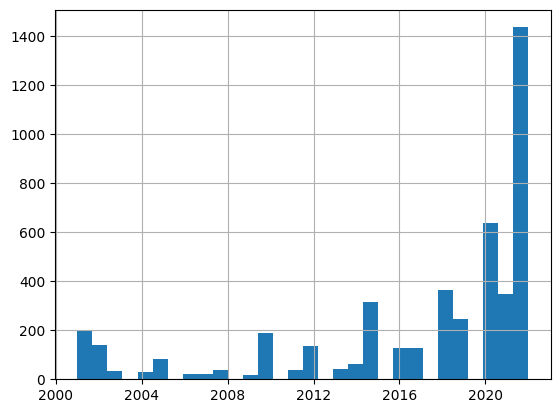

In [ ]:
# Audit: How properties built over time
build_in_year_plot = listings[(listings['built_in_year_clean'] < '2023' )  &  (listings['built_in_year_clean'] > '2000' ) ]['built_in_year_clean']

build_in_year_plot.hist(bins=30)
plt.show()

In [ ]:
# Which columns still have missing values

listings.isnull().sum()

,0
url,0
city,0
type,16
property_area,16
price_str,16
purpose,16
location,16
built_in_year,6315
parking_spaces,8599
floors,9889


Bining the property size for further analysis


Proparty Size as per its area_sqyd



In [ ]:
# Make sure area_bin exists
bins = [0, 100, 250, 500, 1000, 2000, 5000, float('inf')]
labels = ['Tiny (<100)', 'Small (100-250)', 'Medium (250-500)', 'Large (500-1000)', 'Very Large (1000-2000)', 'Luxury (2000-5000)', 'Estate (5000+)']



In [ ]:
# Create the area_bin column
listings['property_size'] = pd.cut(listings['area_sqyd'], bins=bins, labels=labels, right=False)

In [ ]:
# Check distribution
listings['property_size'].value_counts().sort_index()

,count
property_size,
Tiny (<100),1421
Small (100-250),8078
Medium (250-500),4887
Large (500-1000),3118
Very Large (1000-2000),555
Luxury (2000-5000),149
Estate (5000+),31


In [ ]:
listings['property_size'].value_counts()

,count
property_size,
Small (100-250),8078
Medium (250-500),4887
Large (500-1000),3118
Tiny (<100),1421
Very Large (1000-2000),555
Luxury (2000-5000),149
Estate (5000+),31


# Fixing Purpose Column


---

Audit purpose column in relation with price so we get the idea, if values represent sale or rent

In [ ]:
# Audit 'purpose' column
summary = (
    listings[listings['type'] == 'Flat'].groupby(['purpose', 'type', 'property_size'], observed=False)
    .agg(
        avg_price=('price', 'mean'),
        avg_area=('area_sqyd', 'mean')
        )
)

# Just display formatted
print(summary.map(lambda v: f"{v:,.0f}" if pd.notna(v) else ""))

                                       avg_price avg_area
purpose  type property_size                              
For      Flat Tiny (<100)                 48,421       72
              Small (100-250)            113,888      165
              Medium (250-500)           234,149      308
              Large (500-1000)           663,000      657
              Very Large (1000-2000)     105,000    1,605
              Luxury (2000-5000)         366,667    2,448
              Estate (5000+)                             
For Sale Flat Tiny (<100)              8,285,914       71
              Small (100-250)         25,262,571      164
              Medium (250-500)        59,137,220      321
              Large (500-1000)        97,750,000      651
              Very Large (1000-2000)  50,550,000    1,360
              Luxury (2000-5000)      21,200,000    3,025
              Estate (5000+)          21,200,000   26,560


In [ ]:
# As the result suggest the 'For ' and 'For Sale', have significantly higher difference between the pricing, the 'For ' is 'For Rent'
#  Updating all values of 'For ' to 'For Rent'
listings['purpose'] = listings['purpose'].replace('For ', 'For Rent')

In [ ]:
summary = (
    listings[listings['type'] == 'Flat'].groupby(['purpose', 'type', 'property_size'], observed=False)
    .agg(
        avg_price=('price', 'mean'),
        avg_area=('area_sqyd', 'mean')
        )
)

# Just display formatted
print(summary.map(lambda v: f"{v:,.0f}" if pd.notna(v) else ""))

                                       avg_price avg_area
purpose  type property_size                              
For Rent Flat Tiny (<100)                 48,421       72
              Small (100-250)            113,888      165
              Medium (250-500)           234,149      308
              Large (500-1000)           663,000      657
              Very Large (1000-2000)     105,000    1,605
              Luxury (2000-5000)         366,667    2,448
              Estate (5000+)                             
For Sale Flat Tiny (<100)              8,285,914       71
              Small (100-250)         25,262,571      164
              Medium (250-500)        59,137,220      321
              Large (500-1000)        97,750,000      651
              Very Large (1000-2000)  50,550,000    1,360
              Luxury (2000-5000)      21,200,000    3,025
              Estate (5000+)          21,200,000   26,560


Deleting unwanted columns

In [ ]:
# Drop Colums price_str, url,

listings.columns

Index(['url', 'city', 'type', 'property_area', 'price_str', 'purpose',
       'location', 'built_in_year', 'parking_spaces', 'floors', 'bedrooms',
       'bathrooms', 'servant_quarters', 'kitchens', 'store_rooms',
       'property_id', 'state', 'area', 'area_sqyd', 'price',
       'built_in_year_clean', 'property_size'],
      dtype='object')

In [ ]:
# Droping built_in_year column
listings = listings.drop(columns=['built_in_year'])

# Renaming the built_in_year_clean to built_in_year
listings = listings.rename(columns={'built_in_year_clean': 'built_in_year'})

In [ ]:
# Droping url column
listings = listings.drop(columns=['url'])

In [ ]:
# Droping price_str column
listings = listings.drop(columns=['price_str'])

In [ ]:
# Droping location
listings = listings.drop(columns=['location'])

In [ ]:
listings.head(5)

,city,type,property_area,purpose,parking_spaces,floors,bedrooms,bathrooms,servant_quarters,kitchens,store_rooms,property_id,state,area,area_sqyd,price,built_in_year,property_size
0,Karachi,Flat,128 Sq. Yd.,For Sale,NaN,NaN,2,2,NaN,NaN,NaN,52472233-19639-1,Sindh,DHA Defence,128.0,47500000.0,2023-01-01,Small (100-250)
1,Karachi,Flat,161 Sq. Yd.,For Sale,NaN,NaN,2,3,NaN,1.0,NaN,52669975-1485-1,Sindh,DHA Defence,161.0,62500000.0,2023-01-01,Small (100-250)
2,Karachi,Flat,111 Sq. Yd.,For Sale,NaN,NaN,1,2,NaN,NaN,NaN,52682686-19639-1,Sindh,DHA Defence,111.0,34500000.0,2023-01-01,Small (100-250)
3,Karachi,Flat,106 Sq. Yd.,For Sale,1.0,NaN,1,2,1.0,4.0,1.0,52682616-19639-1,Sindh,DHA Defence,106.0,29800000.0,2002-01-01,Small (100-250)
4,Karachi,Flat,156 Sq. Yd.,For Sale,NaN,NaN,2,2,NaN,NaN,NaN,52669997-19639-1,Sindh,DHA Defence,156.0,46500000.0,2023-01-01,Small (100-250)


Deleting Duplicates and Null Values

In [ ]:
listings.drop_duplicates(inplace=True)

In [ ]:
listings.isnull().sum()

,0
city,0
type,10
property_area,10
purpose,10
parking_spaces,8593
floors,9883
bedrooms,10
bathrooms,10
servant_quarters,8592
kitchens,4993


In [ ]:

listings[listings['property_id'].isnull()]

,city,type,property_area,purpose,parking_spaces,floors,bedrooms,bathrooms,servant_quarters,kitchens,store_rooms,property_id,state,area,area_sqyd,price,built_in_year,property_size
2178,Islamabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,NaN
2748,Faisalabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,NaN
3764,Multan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,NaN
9692,Naran,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-01,NaN


In [ ]:
# No of row where 'state', 'property_area', 'price', 'purpose' are null
len(listings[listings[['state', 'property_area', 'price', 'purpose']].isna().all(axis=1)])

10

In [ ]:
# Droping all the rows where 'state', 'property_area', 'price', 'purpose' are null
rows_to_drop = listings[listings[['state', 'property_area', 'price', 'purpose']].isna().all(axis=1)].index
listings = listings.drop(rows_to_drop)


In [ ]:
len(listings[listings[['property_id']].isna().all(axis=1)])

0

Change Column's Data Type

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18239 entries, 0 to 18254
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   city              18239 non-null  object        
 1   type              18239 non-null  object        
 2   property_area     18239 non-null  object        
 3   purpose           18239 non-null  object        
 4   parking_spaces    9656 non-null   float64       
 5   floors            8366 non-null   float64       
 6   bedrooms          18239 non-null  object        
 7   bathrooms         18239 non-null  object        
 8   servant_quarters  9657 non-null   float64       
 9   kitchens          13256 non-null  float64       
 10  store_rooms       9719 non-null   float64       
 11  property_id       18239 non-null  object        
 12  state             18239 non-null  object        
 13  area              18239 non-null  object        
 14  area_sqyd         18239 non

In [ ]:
# Converting the bedrooms, bathrooms columns to
listings['bedrooms'] = pd.to_numeric(listings['bedrooms'], errors='coerce')
listings['bathrooms'] = pd.to_numeric(listings['bathrooms'], errors='coerce')

# Bringing New data points for Analysis
Adding new data points like city population, tier type, median_income, will give more clarity in data analysis

In [ ]:
# Adding new data points

city_data = {
    'city': [
        'Karachi', 'Lahore', 'Islamabad', 'Rawalpindi', 'Faisalabad', 'Peshawar', 'Quetta', 'Hyderabad',
        'Multan', 'Sialkot', 'Gujranwala', 'Bahawalpur', 'Rahim Yar Khan', 'Sukkur', 'Dera Ghazi Khan',
        'Mirpur Khas', 'Abbottabad', 'Sargodha', 'Sheikhupura', 'Okara', 'Jhang', 'Dera Ismail Khan',
        'Vehari', 'Jamshoro', 'Kasur', 'Kharian', 'Haripur', 'Jhelum', 'Murree', 'Chakwal', 'Nowshera',
        'Mardan', 'Chilas', 'Sarai Alamgir', 'Attock', 'Taxila', 'Gwadar', 'Mirpur', 'Gujar Khan', 'Gharo',
        'Swat', 'Daska', 'Sadiqabad', 'Buner', 'Lalamusa', 'Lodhran', 'Pakpattan', 'Chiniot', 'Fateh Jang',
        'Burewala', 'Hafizabad', 'Talagang', 'Galyat'
    ],
    'population': [
        20300000, 13980000, 2360000, 6120000, 9080000, 2410000, 2600000, 2430000,
        5000000, 2500000, 2500000, 3500000, 3500000, 2500000, 3500000,
        2500000, 1500000, 2500000, 2500000, 2500000, 2500000, 2500000,
        2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000,
        2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000,
        2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000, 2500000,
        2500000, 2500000, 2500000, 2500000
    ],
    'tier': [
        1, 1, 1, 1, 1, 1, 1, 1,
        2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3
    ],
    'median_monthly_income': [
        82000, 70000, 90000, 85000, 75000, 65000, 60000, 55000,
        50000, 45000, 45000, 40000, 40000, 45000, 40000,
        45000, 50000, 45000, 45000, 45000, 40000, 40000,
        40000, 40000, 40000, 40000, 40000, 35000, 35000, 35000, 35000,
        35000, 35000, 35000, 35000, 35000, 35000, 35000, 35000, 35000,
        35000, 35000, 35000, 35000, 35000, 35000, 35000, 35000, 35000,
        35000, 35000, 35000, 35000
    ]
}

city_df = pd.DataFrame(city_data)

In [ ]:
listings = listings.merge(city_df, on='city', how='left')

In [ ]:
# Updated no of columns
listings.shape

(18239, 21)

# Reordering the columns

In [ ]:
# Organizing/rearranging columns for csv export
col_list = ['property_id', 'type', 'property_size', 'property_area' , 'area_sqyd' , 'price', 'purpose','built_in_year', 'parking_spaces', 'floors', 'bedrooms', 'bathrooms', 'servant_quarters', 'kitchens', 'store_rooms', 'state', 'city', 'area' , 'tier', 'population', 'median_monthly_income' ]
len(col_list)
# listings.columns

print(len(col_list) , len(listings.columns)  )
listings = listings[col_list]

21 21


Exporting CSV to Prepared for Analytics

In [ ]:
listings.sample(10)

,property_id,type,property_size,property_area,area_sqyd,price,purpose,built_in_year,parking_spaces,floors,...,bathrooms,servant_quarters,kitchens,store_rooms,state,city,area,tier,population,median_monthly_income
16796,52694243-1047-4,Lower Portion,Small (100-250),5 Marla,151.250,33000.0,For Rent,2022-01-01,NaN,NaN,...,2.0,NaN,NaN,NaN,Punjab,Lahore,Marghzar Officers Colony,1.0,13980000.0,70000.0
9054,52729988-547-1,House,Medium (250-500),10 Marla,302.500,39500000.0,For Sale,2024-01-01,NaN,NaN,...,6.0,1.0,2.0,2.0,Punjab,Lahore,LDA Avenue,1.0,13980000.0,70000.0
5651,51204389-3041-1,House,Large (500-1000),1.2 Kanal,726.000,149500000.0,For Sale,2024-01-01,NaN,2.0,...,6.0,1.0,2.0,1.0,Punjab,Rawalpindi,Bahria Town Rawalpindi,1.0,6120000.0,85000.0
12692,52706411-339-4,Lower Portion,Large (500-1000),1 Kanal,605.000,95000.0,For Rent,2023-01-01,1.0,3.0,...,5.0,1.0,1.0,1.0,Islamabad Capital,Islamabad,DHA Defence,1.0,2360000.0,90000.0
7403,52214247-6496-1,House,Medium (250-500),300 Sq. Yd.,300.000,58000000.0,For Sale,2024-01-01,2.0,1.0,...,4.0,1.0,1.0,1.0,Sindh,Hyderabad,Latifabad,1.0,2430000.0,55000.0
13938,52557034-8917-4,House,Small (100-250),5 Marla,151.250,70000.0,For Rent,2022-01-01,5.0,NaN,...,4.0,1.0,1.0,NaN,Punjab,Faisalabad,Eden Valley,1.0,9080000.0,75000.0
17879,52412319-8221-4,House,Medium (250-500),10 Marla,302.500,80000.0,For Rent,2024-01-01,NaN,NaN,...,6.0,1.0,NaN,NaN,Punjab,Sialkot,Citi Housing Society,2.0,2500000.0,45000.0
3960,52707114-10257-1,House,Very Large (1000-2000),2 Kanal,1210.000,62500000.0,For Sale,2012-01-01,4.0,2.0,...,5.0,2.0,2.0,1.0,Punjab,Multan,MDA Road,2.0,5000000.0,50000.0
9548,52540971-16639-1,House,Medium (250-500),10 Marla,302.500,45000000.0,For Sale,2025-01-01,NaN,2.0,...,6.0,NaN,2.0,NaN,Punjab,Wah,New City,NaN,NaN,NaN
6809,52349568-9478-1,Flat,Tiny (<100),2.7 Marla,81.675,8200000.0,For Sale,2023-01-01,NaN,NaN,...,1.0,NaN,NaN,NaN,Khyber Pakhtunkhwa,Peshawar,Old Bara Road,1.0,2410000.0,65000.0


In [ ]:
from google.colab import files

In [ ]:
# Exporting clean data to analyze it for investors
listings.to_csv('listings_v3.csv', index=False)
files.download('listings_v3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>